In [1]:
import pandas as pd
from sklearn.manifold import TSNE

# %matplotlib notebook
import matplotlib.pyplot as plt
import japanize_matplotlib

/home/hidetomo/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
df = pd.read_csv('base_stats.csv')
df = df.replace('-', 0)
data = TSNE(n_components=2, random_state=42).fit_transform(df[['H', 'A', 'B', 'C', 'D', 'S']])

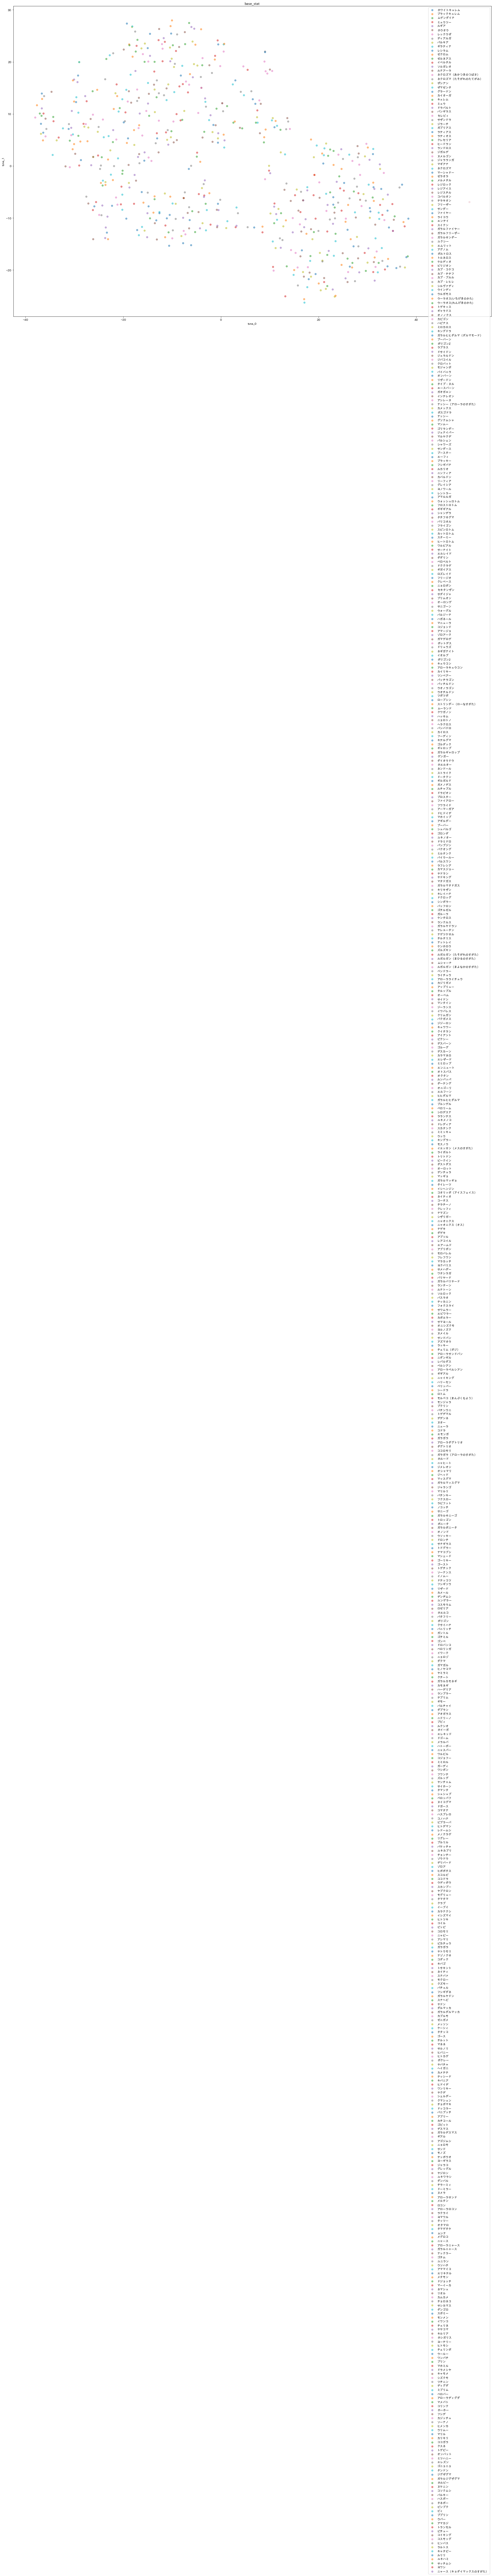

In [3]:
ax = plt.figure(figsize=(30, 20)).add_subplot()
ax.set_title('base_stat')
ax.set_xlabel('tsne_0')
ax.set_ylabel('tsne_1')
for i in range(len(df)):
    ax.scatter(
        data[i][0], data[i][1],
        alpha=0.5, label=df.ポケモン[i])
ax.legend(loc="best")
plt.show()

In [ ]:
fig, ax = plt.subplots()
cmap = plt.cm.RdYlGn

sc = plt.scatter(data[:, 0], data[:, 1], cmap=cmap, s=3)
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                bbox=dict(boxstyle="round", fc="w"),
                arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)
def update_annot(ind):
    i = ind["ind"][0]
    pos = sc.get_offsets()[i]
    annot.xy = pos
    text = df.ポケモン[i]
    annot.set_text(text)
    # annot.get_bbox_patch().set_facecolor(cmap(int(text)/10))

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
               annot.set_visible(False)
               fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

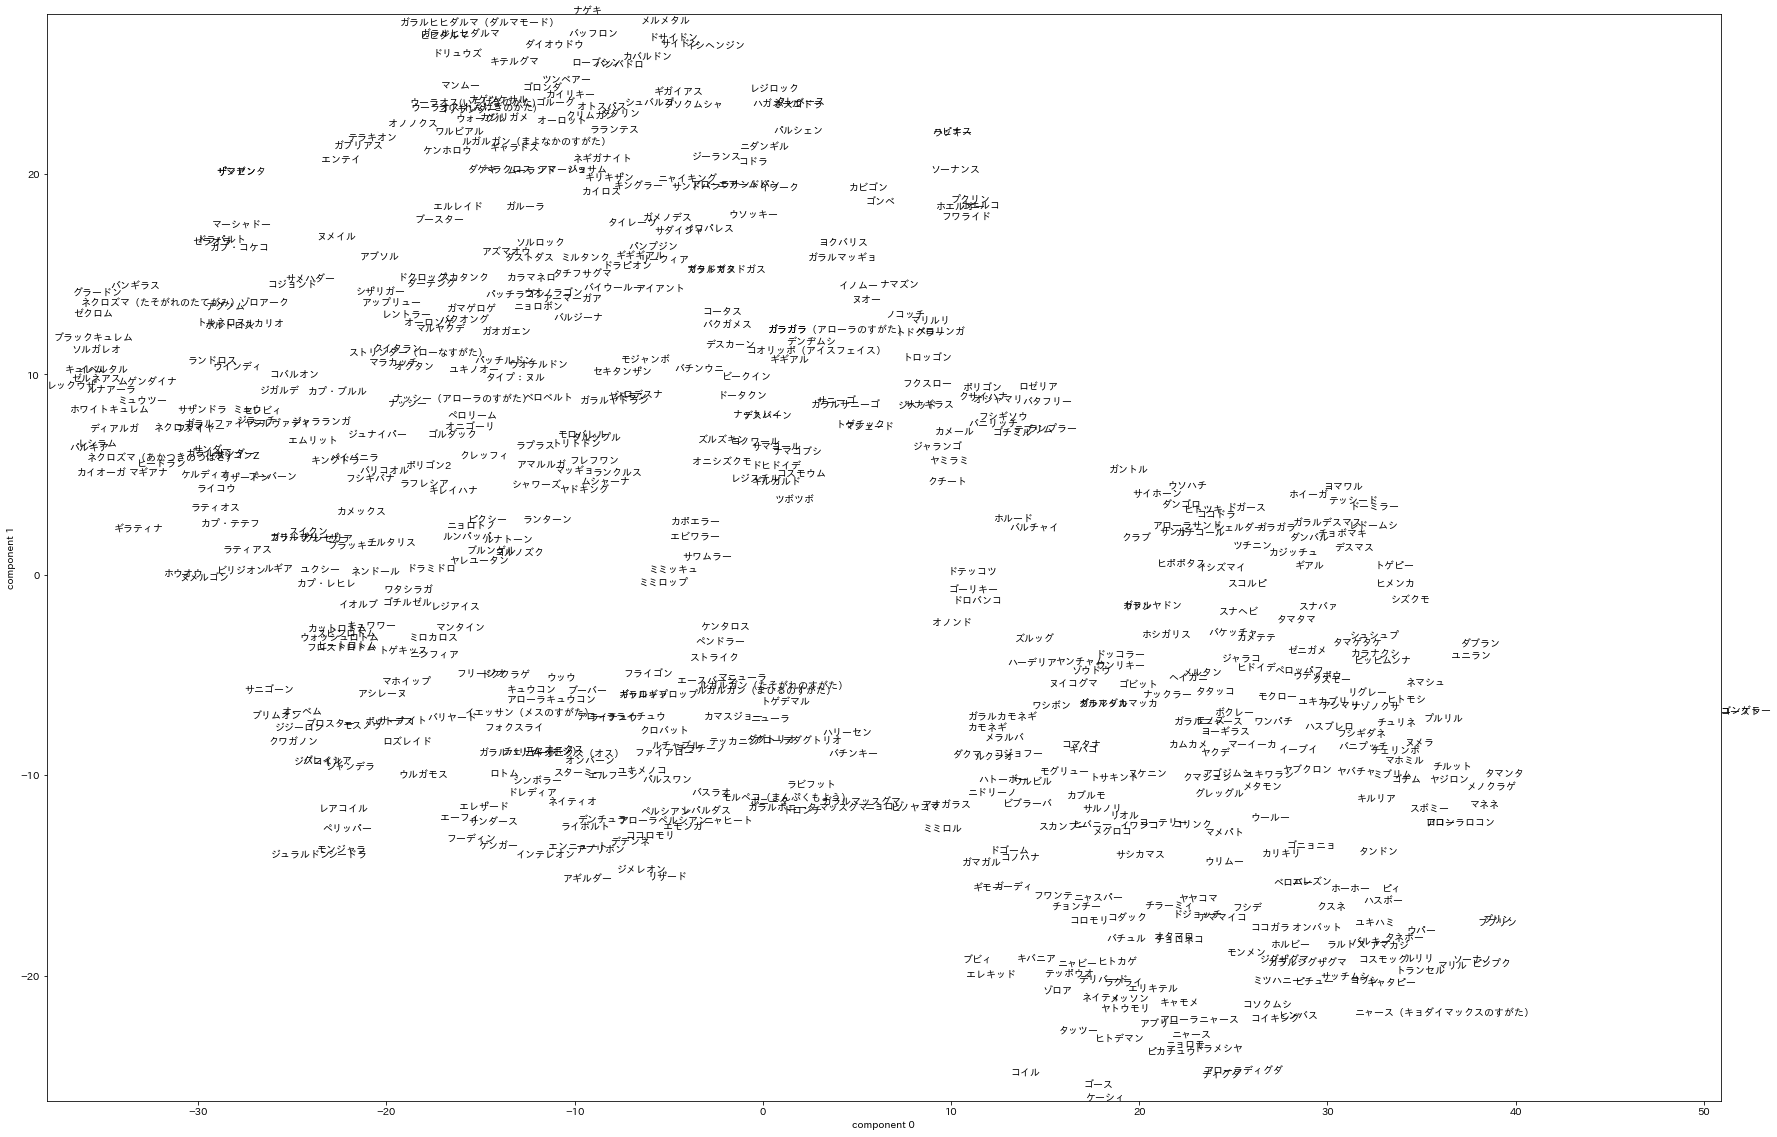

In [5]:
plt.figure(figsize=(30, 20))
plt.xlim(data[:, 0].min(), data[:, 0].max())
plt.ylim(data[:, 1].min(), data[:, 1].max())
plt.xlabel("component 0")
plt.ylabel("component 1")
for x, label in zip(data, df.ポケモン):
    plt.text(x[0], x[1], label)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()